In [62]:
import pandas as pd
import sklearn

In [63]:
x_test = pd.read_csv('data/X_test.csv', encoding='euc-kr')
x_train = pd.read_csv('data/X_train.csv', encoding='euc-kr')
y_train = pd.read_csv('data/y_train.csv', encoding='euc-kr')
x_test['gender']= 0
x_test
final_df = x_test[['cust_id', 'gender']]
final_df

,cust_id,gender
0,3500,0
1,3501,0
2,3502,0
3,3503,0
4,3504,0
...,...,...
2477,5977,0
2478,5978,0
2479,5979,0
2480,5980,0


In [64]:
print(x_train.shape,y_train.shape, x_test.shape)


(3500, 10) (3500, 2) (2482, 11)


In [65]:
x = pd.concat([x_train,y_train], join='inner', axis=1)
x.corr()
# x.drop(['cust_id', '주말방문비율'], axis=1, inplace=True)
# x_test.drop(['cust_id', '주말방문비율'], axis=1, inplace=True)

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,cust_id,gender
cust_id,1.000000,-0.008004,-0.005883,0.070135,-0.025234,-0.004840,0.001900,0.020070,1.000000,-0.001994
총구매액,-0.008004,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944,-0.008004,-0.150141
최대구매액,-0.005883,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837,-0.005883,-0.114323
환불금액,0.070135,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125,0.070135,-0.078025
내점일수,-0.025234,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200,-0.025234,-0.155000
내점당구매건수,-0.004840,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151,-0.004840,-0.043917
주말방문비율,0.001900,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372,0.001900,0.073598
구매주기,0.020070,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000,0.020070,0.041450
cust_id,1.000000,-0.008004,-0.005883,0.070135,-0.025234,-0.004840,0.001900,0.020070,1.000000,-0.001994
gender,-0.001994,-0.150141,-0.114323,-0.078025,-0.155000,-0.043917,0.073598,0.041450,-0.001994,1.000000


In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
 10  cust_id  3500 non-null   int64  
 11  gender   3500 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 328.2+ KB


In [67]:
x.fillna(0, inplace=True)
x.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,cust_id,gender
count,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,8.289786e+06,19.253714,2.834963,0.307246,20.958286,1749.500000,0.376000
std,1010.507298,1.635065e+08,3.199235e+07,3.010204e+07,27.174942,1.912368,0.289752,24.748682,1010.507298,0.484449
min,0.000000,-5.242152e+07,-2.992000e+06,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,0.000000e+00,2.000000,1.666667,0.027291,4.000000,874.750000,0.000000
50%,1749.500000,2.822270e+07,9.837000e+06,0.000000e+00,8.000000,2.333333,0.256410,13.000000,1749.500000,0.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.642250e+06,25.000000,3.375000,0.448980,28.000000,2624.250000,1.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000,3499.000000,1.000000


In [68]:
x = x[x['총구매액']>0]
x

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,cust_id,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,2,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,3,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3495,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,3496,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,3497,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,3498,0


In [69]:
x.describe()
x.corr()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,cust_id,gender
cust_id,1.000000,-0.007048,-0.006462,0.024723,-0.025160,-0.005347,0.003080,0.020573,1.000000,-0.000913
총구매액,-0.007048,1.000000,0.700728,0.494191,0.659013,0.090004,0.014996,-0.214310,-0.007048,-0.151706
최대구매액,-0.006462,0.700728,1.000000,0.440037,0.373643,0.019419,0.022833,-0.116715,-0.006462,-0.115071
환불금액,0.024723,0.494191,0.440037,1.000000,0.393216,0.000065,-0.024894,-0.141934,0.024723,-0.115379
내점일수,-0.025160,0.659013,0.373643,0.393216,1.000000,0.225682,-0.009681,-0.294606,-0.025160,-0.156264
내점당구매건수,-0.005347,0.090004,0.019419,0.000065,0.225682,1.000000,0.009317,-0.091943,-0.005347,-0.044509
주말방문비율,0.003080,0.014996,0.022833,-0.024894,-0.009681,0.009317,1.000000,0.004371,0.003080,0.074609
구매주기,0.020573,-0.214310,-0.116715,-0.141934,-0.294606,-0.091943,0.004371,1.000000,0.020573,0.040043
cust_id,1.000000,-0.007048,-0.006462,0.024723,-0.025160,-0.005347,0.003080,0.020573,1.000000,-0.000913
gender,-0.000913,-0.151706,-0.115071,-0.115379,-0.156264,-0.044509,0.074609,0.040043,-0.000913,1.000000


In [73]:
x

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,gender
0,68282840,11264000,6860000.0,기타,강남점,19,0
1,2136000,2136000,300000.0,스포츠,잠실점,2,0
2,3197000,1639000,0.0,남성 캐주얼,관악점,2,1
3,16077620,4935000,0.0,기타,광주점,18,1
4,29050000,24000000,0.0,보석,본 점,2,0
...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,골프,본 점,1,1
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1
3497,75000,75000,0.0,주방용품,창원점,1,0
3498,1875000,1000000,0.0,화장품,본 점,2,0


In [71]:
x.drop(['cust_id','내점당구매건수','주말방문비율','구매주기'], axis=1, inplace=True)
x_test.drop(['cust_id','내점당구매건수','주말방문비율','구매주기'], axis=1, inplace=True)

In [77]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(x)
x_scaled = ss.transform(x)
x_test_scaled = ss.transform(x_test)

In [78]:
x_scaled

array([[-0.14619159, -0.26316897, -0.04394869, ..., -1.40784646,
        -0.01068317, -0.77803328],
       [-0.55044213, -0.54837235, -0.27189041, ..., -1.16427199,
        -0.6357643 , -0.77803328],
       [-0.54395792, -0.56390106, -0.28231457, ..., -0.92069753,
        -0.6357643 ,  1.28529206],
       ...,
       [-0.56303775, -0.61276807, -0.28231457, ...,  2.73291947,
        -0.67253378, -0.77803328],
       [-0.55203721, -0.58386654, -0.28231457, ..., -0.43354859,
        -0.6357643 , -0.77803328],
       [ 1.04442565,  0.46696167, -0.07476947, ..., -0.43354859,
         0.68793692, -0.77803328]])

In [75]:
x['주구매상품'] = x['주구매상품'].factorize()[0]
x['주구매지점'] = x['주구매지점'].factorize()[0]
x_test['주구매상품'] = x_test['주구매상품'].factorize()[0]
x_test['주구매지점'] = x_test['주구매지점'].factorize()[0]
x

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,gender
0,68282840,11264000,6860000.0,0,0,19,0
1,2136000,2136000,300000.0,1,1,2,0
2,3197000,1639000,0.0,2,2,2,1
3,16077620,4935000,0.0,0,3,18,1
4,29050000,24000000,0.0,3,4,2,0
...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,9,4,1,1
3496,29628600,7200000,6049600.0,5,7,8,1
3497,75000,75000,0.0,24,17,1,0
3498,1875000,1000000,0.0,8,4,2,0


In [55]:
x.corr()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,gender
총구매액,1.000000,0.700728,0.494191,-0.188539,-0.022932,0.659013,-0.151706
최대구매액,0.700728,1.000000,0.440037,-0.127041,-0.013660,0.373643,-0.115071
환불금액,0.494191,0.440037,1.000000,-0.101979,0.001929,0.393216,-0.115379
주구매상품,-0.188539,-0.127041,-0.101979,1.000000,-0.011402,-0.236380,0.104343
주구매지점,-0.022932,-0.013660,0.001929,-0.011402,1.000000,0.028206,0.024710
내점일수,0.659013,0.373643,0.393216,-0.236380,0.028206,1.000000,-0.156264
gender,-0.151706,-0.115071,-0.115379,0.104343,0.024710,-0.156264,1.000000


In [56]:
x.drop('주구매지점', axis=1, inplace=True)
x_test.drop('주구매지점', axis=1, inplace=True)


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x.iloc[:,:-1], x['gender'], random_state=43, shuffle=True, stratify=x['gender'], test_size=0.2)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(2792, 5) (698, 5) (2792,) (698,)


In [58]:
x_train

,총구매액,최대구매액,환불금액,주구매상품,내점일수
137,12000,12000,0.0,12,1
1608,2126000,1876000,0.0,8,2
2774,7348500,3420000,0.0,28,1
992,6643300,3996000,0.0,7,3
1078,305608890,37490000,0.0,7,107
...,...,...,...,...,...
3422,1750000,1680000,0.0,8,1
2471,31417550,8228000,0.0,0,16
2291,18180000,13600000,3245400.0,1,4
1750,2786100,2012500,0.0,21,3


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)



LogisticRegression()

In [60]:
pred_y = model.predict_proba(x_valid)
pred_y

array([[0.72976203, 0.27023797],
       [0.51519338, 0.48480662],
       [0.69112796, 0.30887204],
       ...,
       [0.50188227, 0.49811773],
       [0.69747809, 0.30252191],
       [0.53461782, 0.46538218]])

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('roc_auc_score :', roc_auc_score(y_valid,pred_y[:,1]))
print('accuracy_score :', model.score(x_train,y_train))
print('accuracy_score :', model.score(x_valid,y_valid))

roc_auc_score : 0.6545212184782134
accuracy_score : 0.6228510028653295
accuracy_score : 0.6232091690544412


In [93]:
x_test.drop('gender', axis=1, inplace=True)

In [94]:
final_df

,cust_id,gender
0,3500,0
1,3501,0
2,3502,0
3,3503,0
4,3504,0
...,...,...
2477,5977,0
2478,5978,0
2479,5979,0
2480,5980,0


In [101]:
pred_y = model.predict_proba(x_test)
pred_y[:,1]

array([0.43073902, 0.20599171, 0.24204978, ..., 0.31292152, 0.42835538,
       0.49945173])

In [100]:
x_test.fillna(0, inplace=True)

In [102]:
final_df['gender'] = pred_y[:,1]
final_df

D:\Program\Anaconda\envs\myplace\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cust_id,gender
0,3500,0.430739
1,3501,0.205992
2,3502,0.242050
3,3503,0.491930
4,3504,0.498000
...,...,...
2477,5977,0.429796
2478,5978,0.499412
2479,5979,0.312922
2480,5980,0.428355


In [105]:
final_df.to_csv('수험번호.csv',encoding='utf-8', index=False)


In [113]:
final_df

,cust_id,gender
0,3500,0.430739
1,3501,0.205992
2,3502,0.242050
3,3503,0.491930
4,3504,0.498000
...,...,...
2477,5977,0.429796
2478,5978,0.499412
2479,5979,0.312922
2480,5980,0.428355


In [115]:
for i in pred_y[:,1]:
    if i>0.5:
        print(i)

In [127]:
import numpy as np
aa = np.full((698,1),1)
aa

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [137]:
df= pd.read_csv('data/mtcars.csv',index_col=0)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [141]:
qsec = df['qsec']
qsec_max, qsec_min = qsec.max(), qsec.min()

In [145]:
aa = [(i-qsec_min)/(qsec_max-qsec_min) for i in qsec if (i-qsec_min)/(qsec_max-qsec_min)>0.5]
print(len(aa))

9


In [146]:
aa = [(i-qsec_min)/(qsec_max-qsec_min) for i in qsec]
for i in aa:
    print(i)


0.23333333333333348
0.3
0.4892857142857143
0.5880952380952383
0.3
0.680952380952381
0.15952380952380954
0.6547619047619049
1.0
0.45238095238095255
0.5238095238095237
0.3452380952380951
0.3690476190476193
0.41666666666666674
0.4142857142857144
0.39523809523809533
0.3476190476190479
0.5916666666666667
0.4785714285714286
0.6428571428571428
0.6559523809523813
0.2821428571428573
0.3333333333333335
0.10833333333333336
0.3035714285714287
0.5238095238095237
0.26190476190476186
0.2857142857142856
0.0
0.11904761904761907
0.011904761904761864
0.48809523809523836


In [148]:
x_test[x_test['총구매액']<0]

,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,구매주기
579,-150000,-150000,150000.0,10,1,1.0,0
1177,-37440000,-37440000,37440000.0,30,1,1.0,0


In [149]:
x[x['총구매액']<0]

,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,구매주기,gender


In [1]:
from sklearn.metrics import roc_auc_score

In [264]:
import pandas as pd
import sklearn

x_test = pd.read_csv('data/X_test.csv', encoding='euc-kr')
x_train = pd.read_csv('data/X_train.csv', encoding='euc-kr')
y_train = pd.read_csv('data/y_train.csv', encoding='euc-kr')
x_test['gender']= 0
x_test
final_df = x_test[['cust_id', 'gender']]

In [265]:
x = pd.concat([x_train, y_train], join='inner',axis=1)
x.drop('cust_id', axis=1, inplace=True)
x_test.drop('cust_id', axis=1, inplace=True)
# y_train.drop('cust_id', axis=1, inplace=True)

In [266]:
x

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,1
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,0
3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,0


In [267]:
x.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)

In [268]:
x = x[x['총구매액']>0]
x_test = x_test[x_test['총구매액']>0]

In [269]:
x.corr()
# x.drop(['내점당구매건수','주말방문비율','구매주기'], axis=1, inplace=True)
# x_test.drop(['내점당구매건수','주말방문비율','구매주기'], axis=1, inplace=True)
x.drop(['주구매상품','주구매지점'], axis=1, inplace=True)
x_test.drop(['주구매상품','주구매지점'], axis=1, inplace=True)

D:\Program\Anaconda\envs\myplace\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [270]:
print(x['주구매상품'].nunique())
print(x_test['주구매상품'].nunique())
print(x['주구매지점'].nunique())
print(x_test['주구매지점'].nunique())

KeyError: '주구매상품'

In [9]:
count=0
count_=0
for i in x_test['주구매상품'].unique():
    if i in x['주구매상품'].unique():
        count+=1
    if i not in x['주구매상품'].unique():
        print('들어가 있지 않은 상품 :', i)
print('들어가 있는 상품 수 :', count)
for i in x['주구매상품'].unique():
    if i in x_test['주구매상품'].unique():
        count_ +=1
    if i not in x_test['주구매상품'].unique():
        print('들어가 있지 않은 상품 :', i)
print('들어가 있는 상품 수 :', count_)

들어가 있는 상품 수 : 41
들어가 있지 않은 상품 : 소형가전
들어가 있는 상품 수 : 41


In [10]:
x['주구매상품'].unique()


array(['기타', '스포츠', '남성 캐주얼', '보석', '디자이너', '시티웨어', '명품', '농산물', '화장품',
       '골프', '구두', '가공식품', '수산품', '아동', '차/커피', '캐주얼', '섬유잡화', '육류',
       '축산가공', '젓갈/반찬', '액세서리', '피혁잡화', '일용잡화', '주방가전', '주방용품', '건강식품',
       '가구', '주류', '모피/피혁', '남성 트랜디', '셔츠', '남성정장', '생활잡화', '트래디셔널',
       '란제리/내의', '커리어', '침구/수예', '대형가전', '통신/컴퓨터', '식기', '소형가전', '악기'],
      dtype=object)

In [11]:
x_test['주구매상품'].unique()


array(['골프', '농산물', '가공식품', '주방용품', '수산품', '화장품', '기타', '스포츠', '디자이너',
       '시티웨어', '구두', '캐주얼', '명품', '건강식품', '남성정장', '커리어', '남성 캐주얼', '축산가공',
       '식기', '피혁잡화', '모피/피혁', '섬유잡화', '트래디셔널', '차/커피', '육류', '가구', '아동',
       '셔츠', '액세서리', '젓갈/반찬', '일용잡화', '통신/컴퓨터', '생활잡화', '주방가전', '란제리/내의',
       '남성 트랜디', '보석', '대형가전', '주류', '침구/수예', '악기'], dtype=object)

In [12]:
count=0
count_=0
for i in x_test['주구매지점'].unique():
    if i in x['주구매지점'].unique():
        count+=1
    if i not in x['주구매지점'].unique():
        print('들어가 있지 않은 지점 :', i)
print('들어가 있는 지점 수 :', count)
for i in x['주구매지점'].unique():
    if i in x_test['주구매지점'].unique():
        count_ +=1
    if i not in x_test['주구매지점'].unique():
        print('들어가 있지 않은 지점 :', i)
print('들어가 있는 지점 수 :', count_)


들어가 있는 지점 수 : 24
들어가 있는 지점 수 : 24


In [13]:
x['주구매상품'] = x['주구매상품'].factorize()[0]
x['주구매지점'] = x['주구매지점'].factorize()[0]
x_test['주구매상품'] = x_test['주구매상품'].factorize()[0]
x_test['주구매지점'] = x_test['주구매지점'].factorize()[0]

D:\Program\Anaconda\envs\myplace\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Program\Anaconda\envs\myplace\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
x = x[x['주구매상품']!= '소형가전']
# x.drop(['주구매상품','주구매지점'], axis=1, inplace=True)

In [15]:
x.drop(['주구매지점'], axis=1, inplace=True)
x_test.drop(['주구매지점'], axis=1, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x.iloc[:,:-1], x['gender'], test_size=0.1,shuffle=True, stratify=x['gender'],
                                                      random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print('train_accuracy :',model.score(x_train,y_train))
print('vlaid_accuracy :', model.score(x_valid,y_valid))

train_accuracy : 0.6230499840815027
vlaid_accuracy : 0.6217765042979942


In [28]:
pred_y = model.predict_proba(x_valid)
pred = model.predict(x_valid)
print('model_roc :', roc_auc_score(y_valid, pred_y[:,1]))

model_roc : 0.6444979751431364


In [31]:
print(model.classes_)
print(model.coef_.shape, model.intercept_.shape)
x

[0 1]
(1, 5) (1,)


,총구매액,최대구매액,환불금액,주구매상품,내점일수,gender
0,68282840,11264000,6860000.0,0,19,0
1,2136000,2136000,300000.0,1,2,0
2,3197000,1639000,0.0,2,2,1
3,16077620,4935000,0.0,0,18,1
4,29050000,24000000,0.0,3,2,0
...,...,...,...,...,...,...
3495,3175200,3042900,0.0,9,1,1
3496,29628600,7200000,6049600.0,5,8,1
3497,75000,75000,0.0,24,1,0
3498,1875000,1000000,0.0,8,2,0


In [194]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x.iloc[:,:-1])
x_scaled = ss.transform(x.iloc[:,:-1])
x_test_scale = ss.transform(x_test.iloc[:,:-1])
x_scaled

array([[-0.14648521, -0.26347018, -0.04409894, -1.19327151, -0.01106706],
       [-0.55065652, -0.54862207, -0.27198054, -1.07087389, -0.6360501 ],
       [-0.54417359, -0.56414798, -0.28240195, -0.94847627, -0.6360501 ],
       ...,
       [-0.56324967, -0.61300617, -0.28240195,  1.74427134, -0.67281381],
       [-0.55225129, -0.58410986, -0.28240195, -0.21409056, -0.6360501 ],
       [ 1.04389868,  0.46652866, -0.07491159, -1.19327151,  0.68744341]])

In [212]:
x_train, x_valid, y_train, y_valid = train_test_split(x_scaled, x['gender'], test_size=0.2,shuffle=True, stratify=x['gender'],
                                                      random_state=42)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       217
           1       0.00      0.00      0.00       132

    accuracy                           0.62       349
   macro avg       0.31      0.50      0.38       349
weighted avg       0.39      0.62      0.48       349



D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
pred_y[:,1]

SyntaxError: invalid syntax (<ipython-input-38-b5dfd33ceb8c>, line 1)

In [33]:
other_x = x.drop(['주구매상품'],axis=1)
other_x

,총구매액,최대구매액,환불금액,내점일수,gender
0,68282840,11264000,6860000.0,19,0
1,2136000,2136000,300000.0,2,0
2,3197000,1639000,0.0,2,1
3,16077620,4935000,0.0,18,1
4,29050000,24000000,0.0,2,0
...,...,...,...,...,...
3495,3175200,3042900,0.0,1,1
3496,29628600,7200000,6049600.0,8,1
3497,75000,75000,0.0,1,0
3498,1875000,1000000,0.0,2,0


In [300]:
x_train, x_valid, y_train, y_valid = train_test_split(x, x['gender'], test_size=0.2,shuffle=True, stratify=x['gender'],
                                                      random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
print('train_accuracy :',model.score(x_train,y_train))
print('vlaid_accuracy :', model.score(x_valid,y_valid))
print('-'*30)
pred_y = model.predict_proba(x_valid)
pred = model.predict(x_valid)
print('model_roc :', roc_auc_score(y_valid, pred_y[:,1]))

train_accuracy : 0.6228510028653295
vlaid_accuracy : 0.6232091690544412
------------------------------
model_roc : 0.6401206240985972


In [244]:
x_train, x_valid, y_train, y_valid = train_test_split(x.iloc[:,:-1], x['gender'], test_size=0.3,shuffle=True, stratify=x['gender'],
                                                      random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
print('train_accuracy :',model.score(x_train,y_train))
print('vlaid_accuracy :', model.score(x_valid,y_valid))
print('-'*30)
pred_y = model.predict_proba(x_valid)
pred = model.predict(x_valid)
print('model_roc :', roc_auc_score(y_valid, pred_y[:,1]))

train_accuracy : 0.6230045026606631
vlaid_accuracy : 0.6227316141356256
------------------------------
model_roc : 0.6454376019259145


In [301]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', max_iter=100, tol=None,random_state=42)
classes = np.unique(y_train)
model.fit(x_train, y_train)
# model.partial_fit(x_train, y_train, classes=classes)
print('train_accuracy :',model.score(x_train,y_train))
print('vlaid_accuracy :', model.score(x_valid,y_valid))
print('-'*30)
pred_y = model.predict_proba(x_valid)
print('model_roc :', roc_auc_score(y_valid, pred_y[:,1]))

train_accuracy : 0.6228510028653295
vlaid_accuracy : 0.6232091690544412
------------------------------
model_roc : 0.5


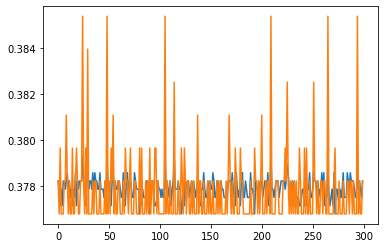

In [302]:
train_score = []
valid_score = []
for _ in range(0,300):
    model.partial_fit(x_train, y_train, classes=classes)
    train_score.append(model.score(x_train, y_train))
    valid_score.append(model.score(x_valid, y_valid))
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(valid_score)
plt.show()

In [50]:
classes

array([0, 1], dtype=int64)

In [167]:
other__x = other_x.iloc[:,:-1]
other__x

,총구매액,최대구매액,환불금액,내점일수
0,68282840,11264000,6860000.0,19
1,2136000,2136000,300000.0,2
2,3197000,1639000,0.0,2
3,16077620,4935000,0.0,18
4,29050000,24000000,0.0,2
...,...,...,...,...
3495,3175200,3042900,0.0,1
3496,29628600,7200000,6049600.0,8
3497,75000,75000,0.0,1
3498,1875000,1000000,0.0,2


In [297]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x.iloc[:,:-1])
scaled_x = ss.transform(x.iloc[:,:-1])
scaled_x

array([[-0.14619159, -0.26316897, -0.04394869, ...,  0.55420934,
         0.76029503, -0.16173746],
       [-0.55044213, -0.54837235, -0.27189041, ..., -0.69942162,
        -1.06047634, -0.80785422],
       [-0.54395792, -0.56390106, -0.28231457, ..., -0.4376745 ,
        -1.06047634, -0.80785422],
       ...,
       [-0.56303775, -0.61276807, -0.28231457, ..., -0.96116874,
        -1.06047634, -0.84823652],
       [-0.55203721, -0.58386654, -0.28231457, ..., -0.96116874,
        -1.06047634,  0.72667308],
       [ 1.04442565,  0.46696167, -0.07476947, ..., -0.21725587,
         0.55426572, -0.52517814]])

In [322]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_valid, y_train, y_valid = train_test_split(x.iloc[:,:-1], x['gender'], test_size=0.2,shuffle=True, stratify=x['gender'],
                                                      random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42, min_impurity_decrease=0.00005)
model.fit(x_train, y_train)

print('train_accuracy :',model.score(x_train,y_train))
print('vlaid_accuracy :', model.score(x_valid,y_valid))
print('-'*30)
pred_y = model.predict_proba(x_valid)
print('model_roc :', roc_auc_score(y_valid, pred_y[:,1]))

train_accuracy : 0.667621776504298
vlaid_accuracy : 0.6232091690544412
------------------------------
model_roc : 0.6238101481578603


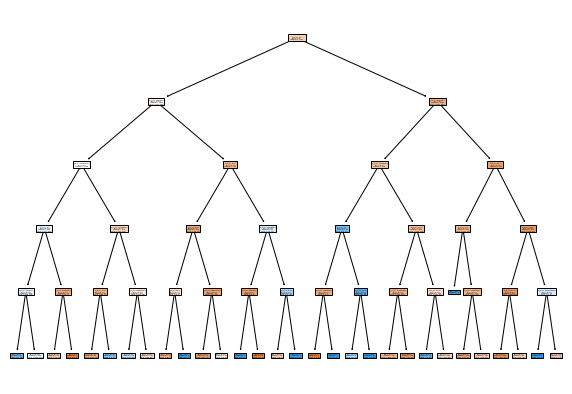

In [306]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(model, filled=True)
plt.show()

In [263]:
x_train

,총구매액,최대구매액,환불금액,주구매상품,내점일수
1095,39595630,21620000,18000.0,7,54
3490,330675700,85050000,0.0,4,23
942,10900,10900,0.0,22,1
2918,534000,444000,0.0,17,2
2976,2365000,1265000,0.0,19,2
...,...,...,...,...,...
2220,10754750,4700000,0.0,0,3
3201,162127490,28800000,0.0,0,24
539,900000,900000,0.0,20,1
2168,44626160,20834000,0.0,19,9


### NEW_TEST

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix
import os
os.chdir('C:/Users/MIngsu/Desktop/titanic')

In [80]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.drop(['index'], axis=1, inplace=True)
test_df.drop(['index'],axis=1, inplace=True)

In [81]:
train_y = train_df['quality']
train_df = train_df.drop(['quality'], axis=1)
print(train_df.shape, test_df.shape)

(5497, 12) (1000, 12)


In [82]:
display(train_df)
display(test_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [9]:
train_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [90]:
train_df['type'] = train_df['type'].map({'white':0,'red':1}).astype(int)
test_df['type'] = test_df['type'].map({'white':0,'red':1}).astype(int)

In [11]:
train_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
fixed acidity,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274,0.483644
volatile acidity,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897,0.652362
citric acid,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376,-0.189211
residual sugar,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457,-0.346199
chlorides,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774,0.518834
free sulfur dioxide,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321,-0.468305
total sulfur dioxide,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566,-0.699765
density,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053,0.388293
pH,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959,0.329762
sulphates,0.300979,0.225174,0.049013,-0.182275,0.400354,-0.189390,-0.272236,0.261879,0.187392,1.000000,-0.008713,0.486080


In [98]:
train_x, valid_x, train_y, valid_y = train_test_split(X.iloc[:,:-1], train_y, shuffle=True,
                                                      stratify=train_y, random_state=42, test_size=0.2)
print(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)

(4397, 12) (1100, 12) (4397,) (1100,)


In [151]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)
print('model_score :',model.score(train_x, train_y))
pred_y = model.predict(scaled_test)
# print('valid_score :', model.score(valid_x, valid_y))
# print('roc_auc_score',roc_auc_score(valid_y[:,1], pred_y))

model_score : 0.5515123948146463


In [39]:
final_df = pd.read_csv('sample_submission.csv')
final_df

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [40]:
final_df['quality'] = pred_y

In [152]:
final_df.to_csv('submission_logistic.csv',index=False)

In [153]:
model = DecisionTreeClassifier(max_depth=23, random_state=42, min_impurity_decrease=0.0001)
model.fit(train_x, train_y)
print('model_score :',model.score(train_x, train_y))
pred_y = model.predict(scaled_test)
# pred_y = model.predict(valid_x)
# print('valid_score :', model.score(valid_x, valid_y))

model_score : 0.9970434387082101


In [154]:
final_df['quality'] = pred_y
final_df.to_csv('submission_decision.csv',index=False)

In [86]:
X = pd.concat([train_df, train_y], join='inner', axis=1)
X['type'] = X['type'].map({'white':0,'red':1}).astype(int)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,5
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,5
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,6
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0,5
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0,6
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0,7
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0,5


In [96]:
ss = StandardScaler()
ss.fit(train_df)
scaled_x = ss.transform(train_df)
scaled_x
ss = StandardScaler()
ss.fit(test_df)
scaled_test = ss.transform(test_df)
scaled_test

array([[ 1.30695096, -0.22057894,  1.09818358, ..., -1.06811399,
         1.0001725 , -0.59428947],
       [ 4.50707005,  0.47727165,  1.78083639, ..., -0.31185409,
        -1.20302483,  1.68268168],
       [-0.55358339, -0.39504159, -0.33538733, ...,  1.06316393,
        -0.8640714 , -0.59428947],
       ...,
       [ 1.15810821,  1.81481861, -0.40365261, ...,  1.40691843,
        -1.03354811,  1.68268168],
       [-0.18147652,  0.41911743, -0.88150958, ...,  0.16940222,
         0.40700399,  1.68268168],
       [ 0.93484409, -0.8021211 , -0.40365261, ..., -1.1368649 ,
         0.83069578, -0.59428947]])

In [93]:
df = pd.DataFrame(data=scaled_x, columns=train_df.columns)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,-0.567197
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1.763057
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,-0.567197
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,-0.567197
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,-0.567197
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,-0.567197
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,-0.567197
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,-0.567197
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,-0.567197


In [94]:
X = pd.concat([df, train_y], join='inner', axis=1)
# X['type'] = X['type'].map({'white':0,'red':1}).astype(int)
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,-0.567197,5
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1.763057,5
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,-0.567197,5
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,-0.567197,6
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,-0.567197,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,-0.567197,5
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,-0.567197,6
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,-0.567197,7
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,-0.567197,5


In [148]:
test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,0
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,1
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,1


In [159]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier()
model.fit(train_x,train_y)
y_pred = model.predict(scaled_test)
final_df['quality'] = pred_y
final_df.to_csv('submission_lgbm.csv',index=False)

In [158]:
test_x

NameError: name 'test_x' is not defined

In [182]:
# 라이브러리(필요한 도구) 불러오기
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import os
os.chdir('C:/Users/MIngsu/Desktop/titanic')

train = pd.read_csv('train.csv')
#-------------------------------------------------------------------------------
train['Age'] = train['Age'].fillna(value = train['Age'].mean())
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})
#-------------------------------------------------------------------------------
train_x = train[['Pclass', 'SibSp','Age', 'Sex']]
train['Embarked'].fillna(value = 'S', inplace = True)
train_y = train['Survived']
# 모델 만들기
model = LogisticRegression(max_iter=1000)
# 학습하기
model.fit(train_x, train_y)
# 평가하기
scores = cross_val_score(model, train_x, train_y, scoring = 'accuracy', cv = 3)
print(scores.mean())
# 테스트 데이터 예측하기
test = pd.read_csv('test.csv')
#-------------------------------------------------------------------------------
test['Age'] = test['Age'].fillna(29)
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})
#-------------------------------------------------------------------------------
test_x = test[['Pclass', 'SibSp', 'Age', 'Sex']]
test_y_pred = model.predict(test_x)
# 제출 파일에 맞게 변형하여 저장하기
submission = pd.read_csv("sample_submission.csv")
submission['Survived'] = test_y_pred
submission.to_csv('submission.csv', index = False)

0.7890011223344556


<AxesSubplot:ylabel='Frequency'>

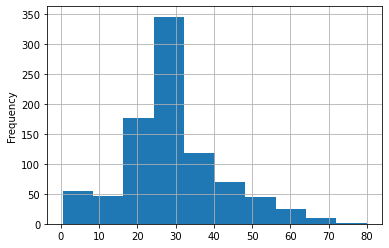

In [191]:
train['Age'].plot(kind='hist', grid =True, bins=10)

In [192]:
test_x


,Pclass,SibSp,Age,Sex
0,3,0,34.5,0
1,3,1,47.0,1
2,2,0,62.0,0
3,3,0,27.0,0
4,3,1,22.0,1
...,...,...,...,...
413,3,0,29.0,0
414,1,0,39.0,1
415,3,0,38.5,0
416,3,0,29.0,0
